# Dataset Info

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

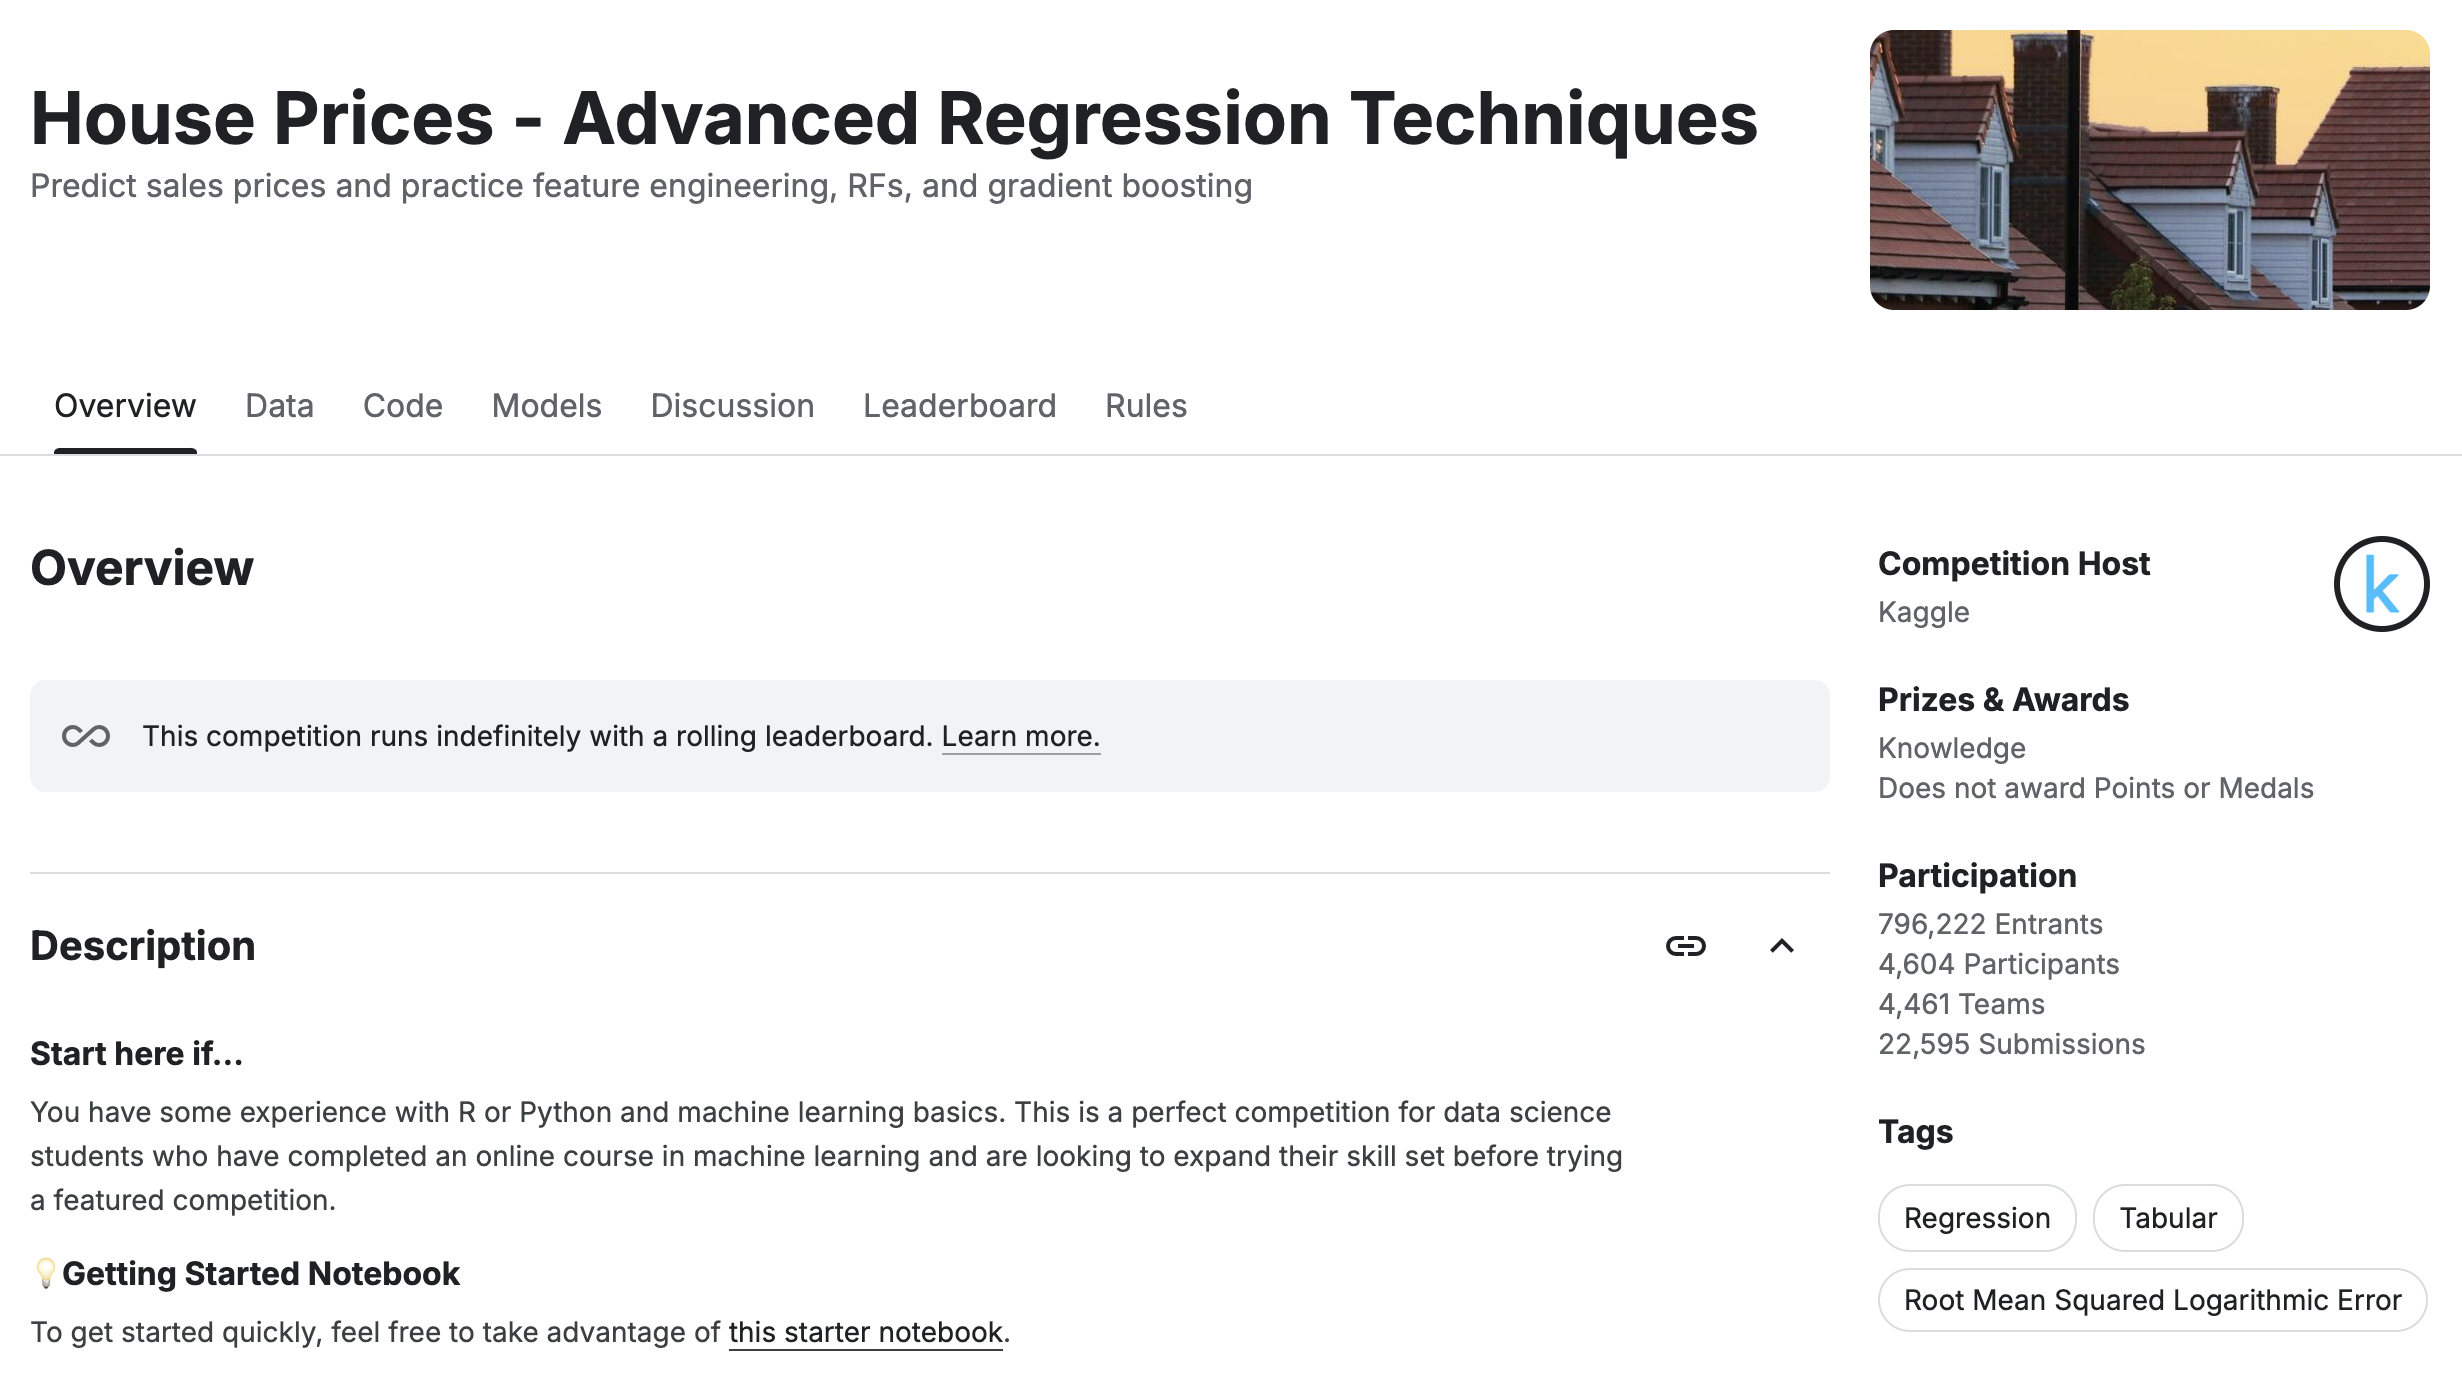

# Get started

## Must-know information

This lab for demo purpose of Linear Regression only, there are many ways you can try to get higher score

For FSDS lab only 
- Only <b>GrLivArea</b> feature is used
- <b><i>lab_train.csv & lab_test.csv</i></b> in demo only


For real Kaggle challenge
- please re-train model with <b>kaggle_train.csv & kaggle_test.csv</b>
- You should use all features 
- You can use other different technique and models to get better model

## Recap ML workflow

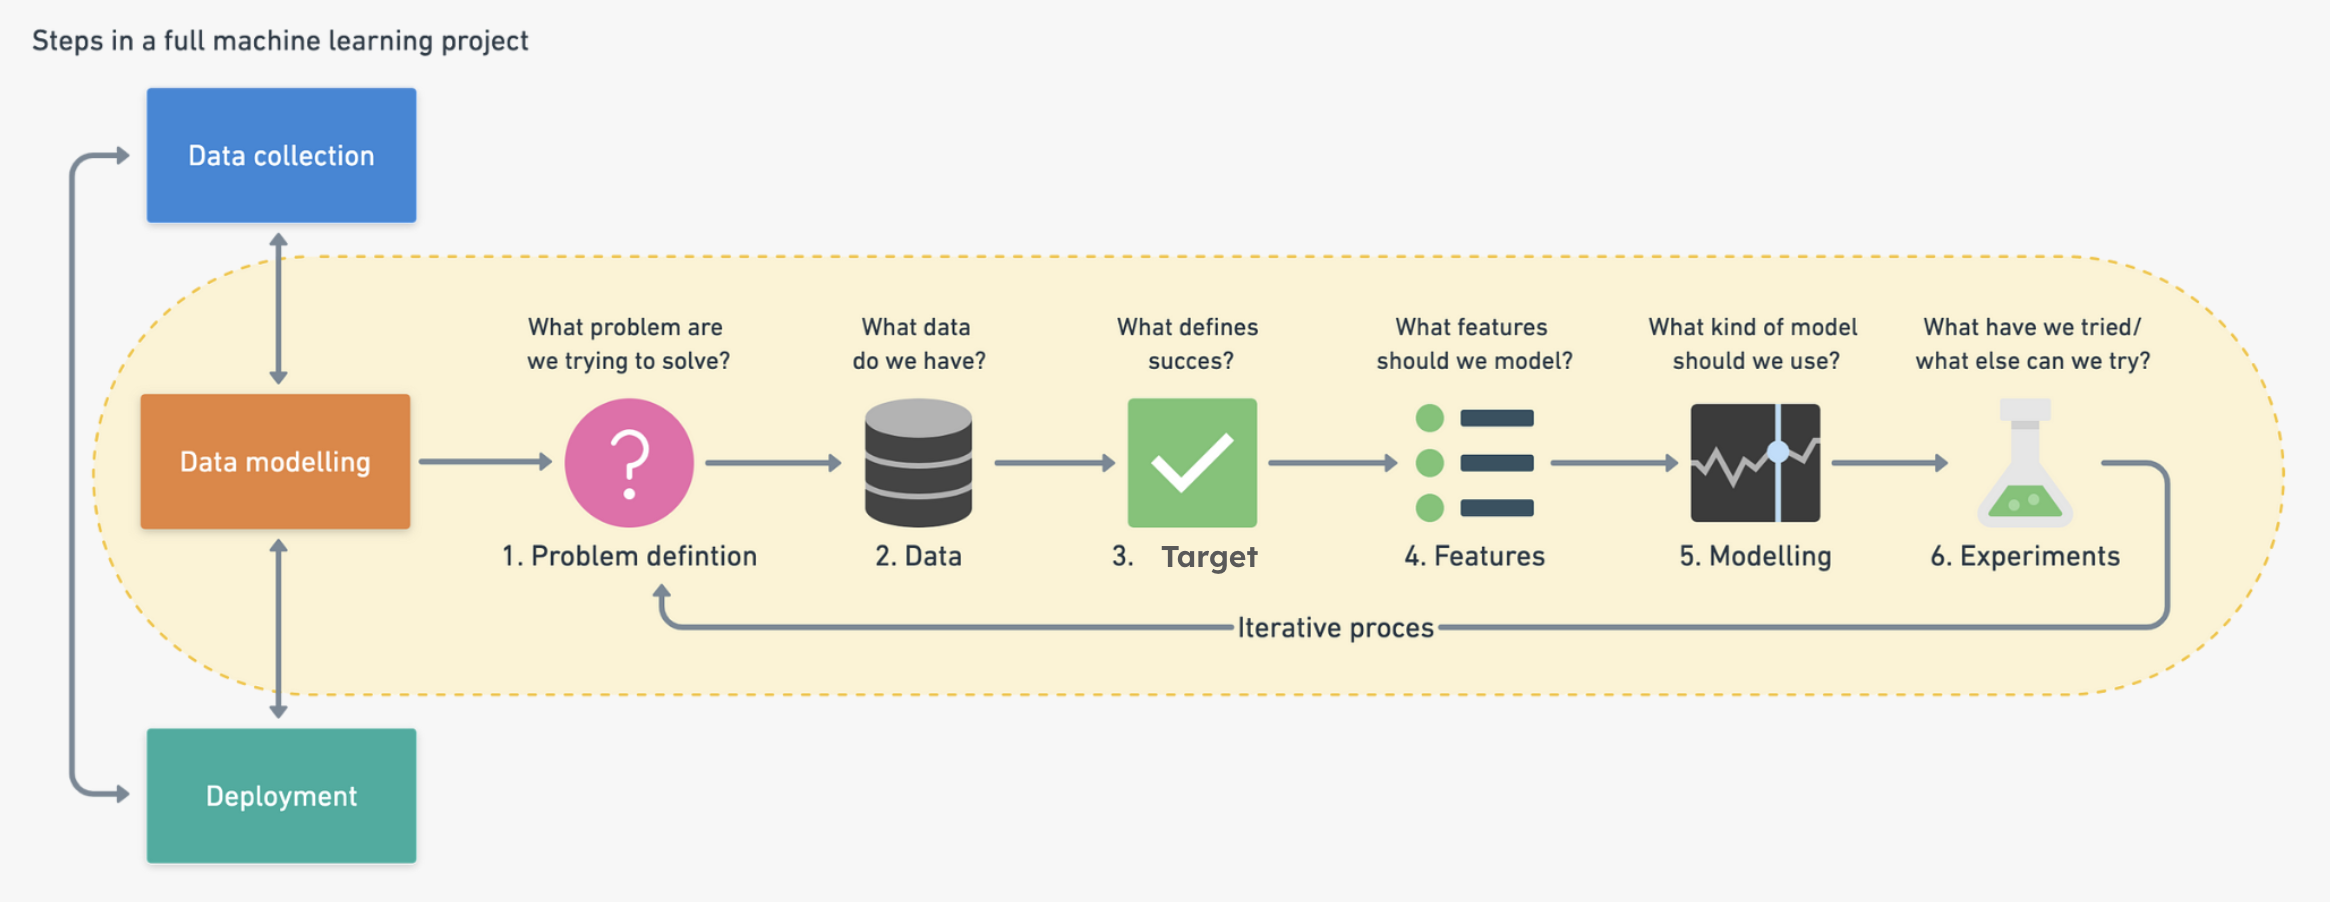

## Import libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Train Data

In [2]:
# Load the dataset
data = pd.read_csv('lab_train.csv', index_col=0)

In [3]:
num_cols = data.select_dtypes('number').columns
data = data[num_cols]

In [4]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1261,1262,20,80.0,9600,5,6,1956,1956,0.0,504,...,0,0,0,0,0,0,0,6,2009,128900
182,183,20,60.0,9060,5,6,1957,2006,98.0,0,...,116,0,0,180,0,0,0,6,2007,120000
1333,1334,50,60.0,7200,5,6,1938,1995,0.0,0,...,0,65,190,0,0,0,0,7,2006,125500
473,474,20,110.0,14977,8,5,2006,2007,304.0,1350,...,250,63,0,0,0,0,0,7,2007,440000
1101,1102,20,61.0,9758,5,5,1971,1971,0.0,412,...,0,0,0,0,0,0,0,7,2007,119500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1006,80,65.0,8385,5,8,1977,1977,220.0,595,...,210,0,0,0,0,0,0,11,2008,149900
611,612,80,NaN,10395,6,6,1978,1978,233.0,605,...,0,0,0,0,0,0,500,7,2007,148000
964,965,60,80.0,11316,7,5,2002,2003,44.0,624,...,0,40,0,0,0,0,0,2,2010,214900
1275,1276,90,95.0,11345,5,5,1948,1950,567.0,220,...,0,0,0,0,0,0,0,7,2007,137000


## Get information of dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1261 to 1156
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotFrontage    950 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1162 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  LowQualFinSF   1168 non-null   int64  
 16  GrLivArea      1168 non-null   int64  
 17  BsmtFullBath   1168 non-null   int64  
 18  BsmtHalfBa

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,732.390411,57.872432,69.202105,10376.441781,6.094178,5.578767,1971.483733,1984.920377,103.951807,445.344178,...,91.942637,46.585616,22.529966,2.826199,15.127568,3.448630,47.811644,6.389555,2007.795377,180118.351884
std,420.097655,43.013997,25.044390,8988.466133,1.369155,1.090880,29.990854,20.558808,180.290643,462.487538,...,123.327207,65.165069,62.220253,25.590234,54.642595,44.896939,549.062005,2.746619,1.313725,79384.594382
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,376.750000,20.000000,58.000000,7389.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,734.000000,50.000000,67.000000,9391.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,379.500000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163250.000000
75%,1096.250000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212225.000000
max,1459.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,552.000000,407.000000,440.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Get feature correlation

<Axes: >

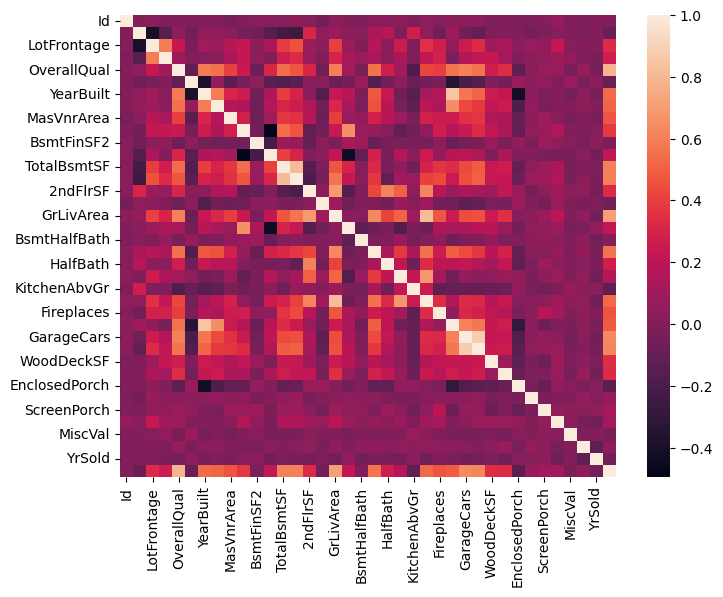

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr())

In [8]:
data.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.135500
KitchenAbvGr    -0.125681
OverallCond     -0.090511
MSSubClass      -0.084145
LowQualFinSF    -0.063085
YrSold          -0.049463
BsmtFinSF2      -0.030805
MiscVal         -0.024048
Id               0.005207
BsmtHalfBath     0.006434
MoSold           0.047731
3SsnPorch        0.056145
PoolArea         0.104233
ScreenPorch      0.110236
BedroomAbvGr     0.167864
BsmtUnfSF        0.212623
BsmtFullBath     0.213924
LotArea          0.259447
HalfBath         0.271560
2ndFlrSF         0.326556
OpenPorchSF      0.329088
LotFrontage      0.331901
WoodDeckSF       0.342239
BsmtFinSF1       0.383604
Fireplaces       0.463793
MasVnrArea       0.467124
GarageYrBlt      0.491575
YearRemodAdd     0.511747
TotRmsAbvGrd     0.528489
YearBuilt        0.534204
FullBath         0.561772
1stFlrSF         0.601459
TotalBsmtSF      0.604597
GarageArea       0.623242
GarageCars       0.633894
GrLivArea        0.707548
OverallQual      0.782164
SalePrice        1.000000
Name: SalePr

## Visualize feature and target

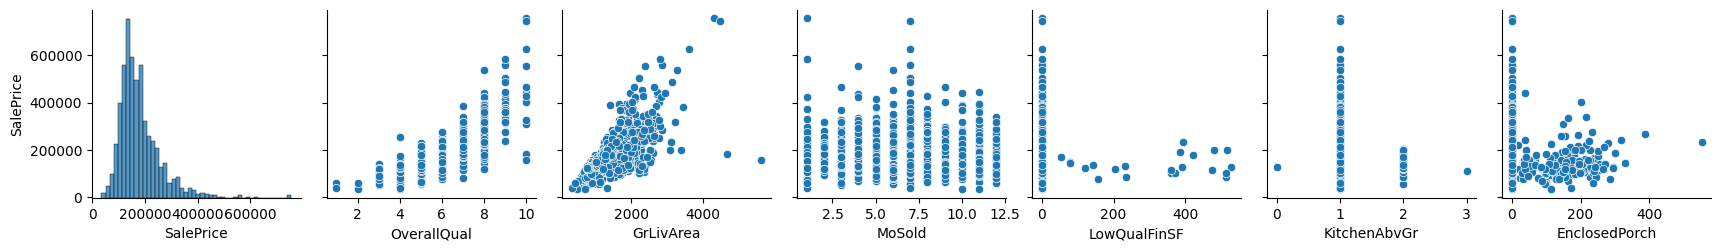

In [9]:
sns.pairplot(data, x_vars=['SalePrice', 'OverallQual', 'GrLivArea', 
                           'MoSold', 'LowQualFinSF', 
                           'KitchenAbvGr', 'EnclosedPorch'], 
             y_vars='SalePrice')
plt.grid()

# Load Test Data

In [10]:
test = pd.read_csv('lab_test.csv', index_col=0)[num_cols]

In [11]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
836,837,30,90.0,8100,5,6,1948,1973,0.0,338,...,0,116,230,0,0,0,0,6,2007,153500
52,53,90,110.0,8472,5,5,1963,1963,0.0,104,...,106,0,0,0,0,0,0,5,2010,110000
768,769,20,70.0,9100,7,5,2004,2005,0.0,24,...,120,33,0,0,0,0,0,10,2006,216837
808,809,80,85.0,13400,5,5,1966,1966,1047.0,516,...,0,0,0,0,0,0,0,6,2006,159950
326,327,120,32.0,10846,8,5,1993,1993,0.0,1619,...,122,30,0,0,0,0,0,5,2008,324000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,75,60.0,6204,4,5,1912,1950,0.0,0,...,0,188,0,0,0,0,0,3,2006,118500
492,493,60,105.0,15578,6,5,2006,2006,0.0,0,...,0,0,0,0,0,0,0,5,2006,172785
1117,1118,20,57.0,9764,5,7,1967,2003,0.0,702,...,0,0,0,0,0,0,0,5,2008,130000
1280,1281,20,67.0,9808,7,5,2002,2002,110.0,788,...,0,72,0,0,0,0,0,3,2009,227000


# Split Train/Test Dataset

In [12]:
# for convention
train = data

In [13]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train.drop('SalePrice', axis=1), test.drop('SalePrice', axis=1), train['SalePrice'], test['SalePrice']

In [14]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1261,1262,20,80.0,9600,5,6,1956,1956,0.0,504,...,338,0,0,0,0,0,0,0,6,2009
182,183,20,60.0,9060,5,6,1957,2006,98.0,0,...,252,116,0,0,180,0,0,0,6,2007
1333,1334,50,60.0,7200,5,6,1938,1995,0.0,0,...,297,0,65,190,0,0,0,0,7,2006
473,474,20,110.0,14977,8,5,2006,2007,304.0,1350,...,908,250,63,0,0,0,0,0,7,2007
1101,1102,20,61.0,9758,5,5,1971,1971,0.0,412,...,280,0,0,0,0,0,0,0,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1006,80,65.0,8385,5,8,1977,1977,220.0,595,...,328,210,0,0,0,0,0,0,11,2008
611,612,80,NaN,10395,6,6,1978,1978,233.0,605,...,564,0,0,0,0,0,0,500,7,2007
964,965,60,80.0,11316,7,5,2002,2003,44.0,624,...,510,0,40,0,0,0,0,0,2,2010
1275,1276,90,95.0,11345,5,5,1948,1950,567.0,220,...,400,0,0,0,0,0,0,0,7,2007


In [15]:
y_train

1261    128900
182     120000
1333    125500
473     440000
1101    119500
         ...  
1005    149900
611     148000
964     214900
1275    137000
1156    179900
Name: SalePrice, Length: 1168, dtype: int64

In [16]:
X_train.shape

(1168, 37)

In [17]:
X_test.shape

(292, 37)

# Data Transform: Simple Imputer, Standard Scaler

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline([
    ('imp', SimpleImputer()),
    ('ss', StandardScaler())
])

In [20]:
pipe.fit(X_train)
X_train_tf = pipe.transform(X_train)
X_test_tf = pipe.transform(X_test)

# Modeling & Evaluation

## Model's lab 1

In [21]:
# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train[['GrLivArea']], y_train)  # Train the model on the training data

LinearRegression()

In [22]:
# Making predictions on the test set
y_pred = model.predict(X_test[['GrLivArea']])

In [23]:
# inspect y_pred
y_pred[:5]

array([185854.41165117, 105894.72436881, 215664.41619654, 134951.40749968,
       203073.18683983])

In [24]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse_1 = np.sqrt(mse)

In [25]:
print(f'Root Mean Squared Error (RMSE): {rmse_1:.2f}')

Root Mean Squared Error (RMSE): 55879.50


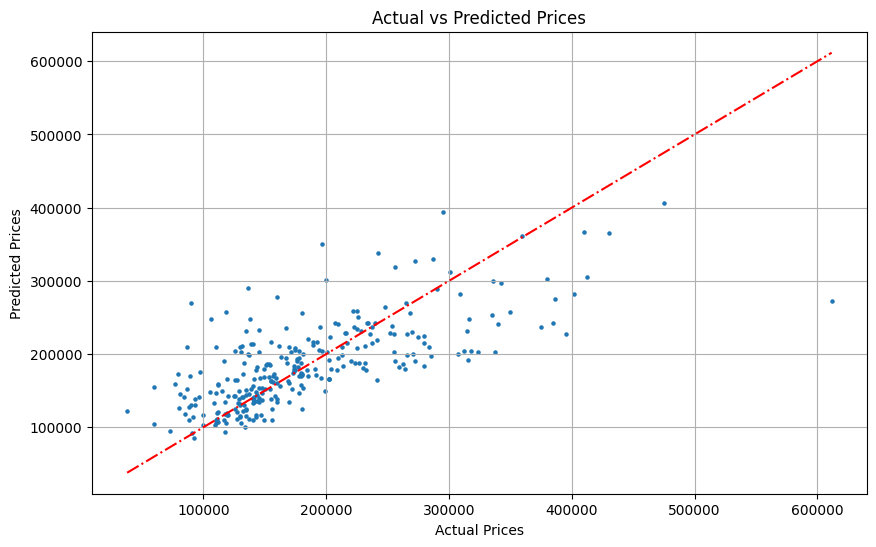

In [26]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

## Use all features with Linear Regression

In [27]:
# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_tf, y_train)  # Train the model on the training data

LinearRegression()

In [28]:
# Making predictions on the test set
y_pred = model.predict(X_test_tf)

In [29]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse)

In [30]:
print(f'Root Mean Squared Error (RMSE): {rmse_2:.2f}')

Root Mean Squared Error (RMSE): 28455.18


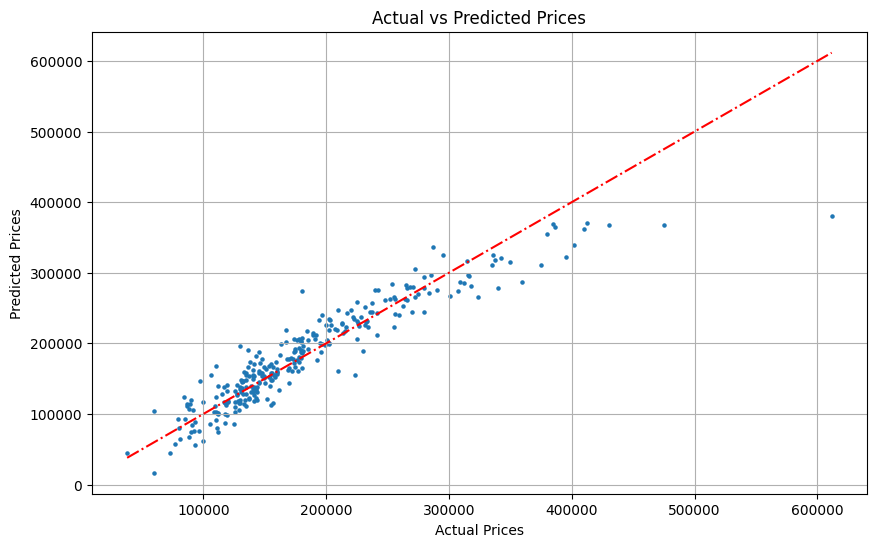

In [31]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

## Use all features with Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Building and training the Random Forest model
model = RandomForestRegressor()
model.fit(X_train_tf, y_train)  # Train the model on the training data

RandomForestRegressor()

In [34]:
# Making predictions on the test set
y_pred = model.predict(X_test_tf)

In [35]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse_3 = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse_3:.2f}')

Root Mean Squared Error (RMSE): 26032.47


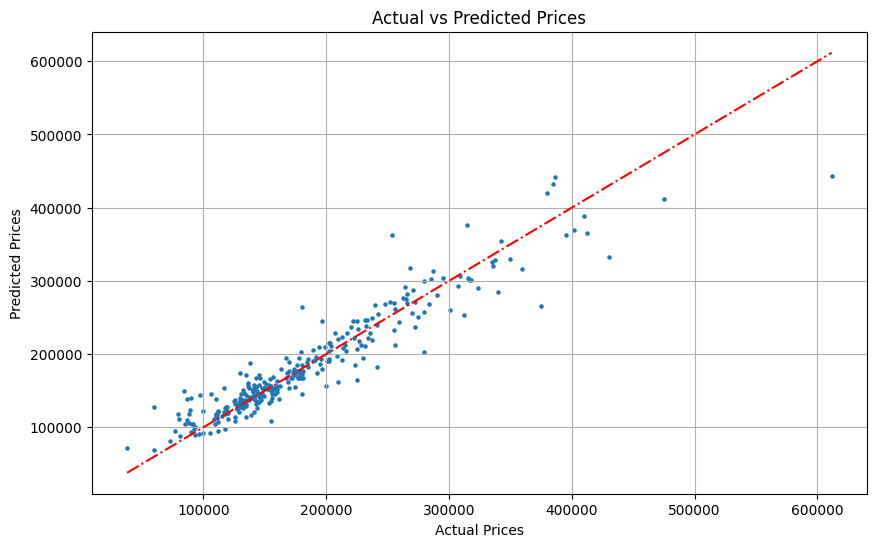

In [36]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

## Linear Regression + Boruta algorithms

In [37]:
from boruta import BorutaPy

In [38]:
# Building and training the Linear Regression model
model = RandomForestRegressor()
model.fit(X_train_tf, y_train)  # Train the model on the training data

RandomForestRegressor()

In [39]:
feat_selector = BorutaPy(model, n_estimators='auto', verbose=1)

In [40]:
feat_selector.fit(X_train_tf, y_train)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

BorutaPy(estimator=RandomForestRegressor(n_estimators=54,
                                         random_state=RandomState(MT19937) at 0x105D01C40),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x105D01C40,
         verbose=1)

In [41]:
feat_selector.support_

array([False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [42]:
feat_selector.ranking_

array([ 9,  6,  1,  1,  1,  3,  1,  1,  1,  1, 18,  5,  1,  1,  1, 22,  1,
       15, 21,  1, 19, 11, 16,  4,  8,  2,  1,  1, 10,  6, 17, 20, 13, 22,
       24, 12, 14])

In [43]:
X_train_filtered = feat_selector.transform(X_train_tf)
X_test_filtered = feat_selector.transform(X_test_tf)

In [44]:
# boruta uses only 14 features and get better score
X_train_tf.shape, X_train_filtered.shape

((1168, 37), (1168, 14))

In [45]:
model_f1 = LinearRegression()
model_f1.fit(X_train_filtered, y_train)

LinearRegression()

In [46]:
# Making predictions on the test set
y_pred = model_f1.predict(X_test_filtered)

In [47]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse_4 = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse_4:.2f}')

Root Mean Squared Error (RMSE): 29999.10


## Random Forest Regressor + Boruta algorithms

In [48]:
model_f2 = RandomForestRegressor()
model_f2.fit(X_train_filtered, y_train)

RandomForestRegressor()

In [49]:
# Making predictions on the test set
y_pred = model_f2.predict(X_test_filtered)

In [50]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse_5 = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse_5:.2f}')

Root Mean Squared Error (RMSE): 27325.01


## Compare result

In [51]:
pd.DataFrame({
    'rmse': [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5]
}, index=['lab1', 'lr', 'rf', 'boruta_lr', 'boruta_rf']).sort_values('rmse')

,rmse
rf,26032.470910
boruta_rf,27325.014925
lr,28455.178727
boruta_lr,29999.098371
lab1,55879.500746


You can try another algorithms with Boruta such as: XGBoost, Decision Tree, LightGBM, CatBoost

In [52]:
rmse_1, rmse_2, rmse_3, rmse_4

(55879.500745774756, 28455.178726732425, 26032.4709102848, 29999.098370604886)

# Kaggle Submission

For who wants to join the real DS challenge:

- Please retrain with kaggle_train.csv and make prediction with kaggle_test.csv in the right format for Kaggle challenge

# End of Lab 4